In [67]:
### Don't mind about this 
import warnings
warnings.filterwarnings('ignore')
###

%matplotlib inline 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier # I will use the Sklearn to get kNN
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
import math
from statistics import mode
from sklearn.model_selection import train_test_split


In [68]:
HandWrittenNumbers_dataset = pd.read_csv('mnist.csv') #put the data in pd Frame
HandWrittenNumbers_dataset.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [69]:
Y = HandWrittenNumbers_dataset['label']
X = HandWrittenNumbers_dataset.iloc[:,1:]

In [70]:
print(HandWrittenNumbers_dataset.shape) # we have 42000 pictures 

print(X.shape)
print(Y.shape)

(42000, 785)
(42000, 784)
(42000,)


In [71]:
#To split the data to test and train
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [72]:
print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)

(33600, 784)
(33600,)
(8400, 784)
(8400,)


In [73]:
#The numbers in the dataset
Y.unique()

array([1, 0, 4, 7, 3, 5, 8, 9, 2, 6])

## Using Cross_validate to use K-Fold cross Validation 

In [76]:
#Sqrt(2267)
from sklearn.model_selection import cross_validate
knn = KNeighborsClassifier(n_neighbors = 46)

knn.fit(X_train,y_train)

#We need to use CrossValidation 
cross_validation = cross_validate(knn,X_train,y_train, cv = 10)

y_pred = knn.predict(X_test)

In [77]:
conf_mat = confusion_matrix(y_test, y_pred,labels = [0,1, 2, 3, 4, 5, 6, 7, 8, 9])
conf_mat

array([[806,   0,   0,   0,   1,   1,   7,   0,   0,   1],
       [  0, 905,   1,   0,   1,   0,   2,   0,   0,   0],
       [  9,  30, 758,   6,   4,   1,   5,  24,   4,   5],
       [  4,  10,   2, 874,   1,  13,   1,  12,  10,  10],
       [  1,  14,   0,   0, 780,   0,   7,   3,   0,  34],
       [  2,   5,   0,   8,   1, 662,  13,   1,   1,   9],
       [  8,   1,   0,   0,   0,   4, 772,   0,   0,   0],
       [  0,  34,   2,   0,   2,   0,   0, 835,   0,  20],
       [  4,  26,   2,  25,   8,  20,   4,   4, 725,  17],
       [  6,   7,   1,  12,   3,   1,   0,  18,   1, 789]])

## Precision, Recall, F1-Score per class

In [78]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred, target_names=['class 0','class 1', 'class 2', 'class 3', 'class 4', 'class 5', 'class 6', 'class 7', 'class 8', 'class 9']))

              precision    recall  f1-score   support

     class 0       0.96      0.99      0.97       816
     class 1       0.88      1.00      0.93       909
     class 2       0.99      0.90      0.94       846
     class 3       0.94      0.93      0.94       937
     class 4       0.97      0.93      0.95       839
     class 5       0.94      0.94      0.94       702
     class 6       0.95      0.98      0.97       785
     class 7       0.93      0.94      0.93       893
     class 8       0.98      0.87      0.92       835
     class 9       0.89      0.94      0.92       838

    accuracy                           0.94      8400
   macro avg       0.94      0.94      0.94      8400
weighted avg       0.94      0.94      0.94      8400



<AxesSubplot:>

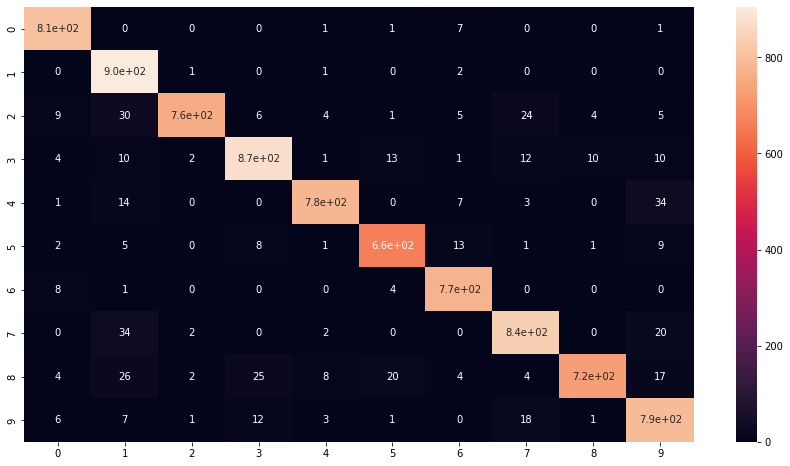

In [79]:
import seaborn as sns
df_cm = pd.DataFrame(conf_mat)
plt.subplots(figsize=(15,8))
sns.heatmap(df_cm, annot=True)

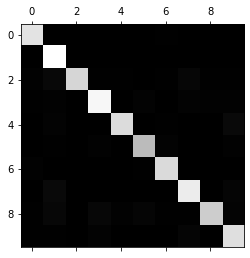

In [80]:
plt.matshow(conf_mat, cmap=plt.cm.gray)
plt.show()


In [81]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print('Accuracy = {}'
      .format(accuracy_score(y_test, y_pred)))
print('Using Micro average')

print('Micro-averaged precision = {:.2f} (treat instances equally)'
      .format(precision_score(y_test, y_pred, average = 'micro')))
print('Micro-averaged Recall = {:.2f} (treat instances equally)'
      .format(recall_score(y_test, y_pred, average = 'micro')))
print('Micro-averaged F1_Score = {:.2f} (treat instances equally)'
      .format(f1_score(y_test, y_pred, average = 'micro')))

print('Using Macro average')
print('Macro-averaged precision = {:.2f} (treat classes equally)'
      .format(precision_score(y_test, y_pred, average = 'macro')))
print('Macro-averaged Recall = {:.2f} (treat classes equally)'
      .format(recall_score(y_test, y_pred, average = 'macro')))

print('Macro-averaged F1_Score = {:.2f} (treat classes equally)'
      .format(f1_score(y_test, y_pred, average = 'macro')))

Accuracy = 0.9411904761904762
Using Micro average
Micro-averaged precision = 0.94 (treat instances equally)
Micro-averaged Recall = 0.94 (treat instances equally)
Micro-averaged F1_Score = 0.94 (treat instances equally)
Using Macro average
Macro-averaged precision = 0.94 (treat classes equally)
Macro-averaged Recall = 0.94 (treat classes equally)
Macro-averaged F1_Score = 0.94 (treat classes equally)


In [82]:
proba = cross_val_predict(knn, X_test, y_test, cv=10, method='predict_proba')

In [83]:
from sklearn.metrics import roc_auc_score

from sklearn.preprocessing import label_binarize
yt=label_binarize(y_test,classes=list(range(10)))

In [84]:
proba.shape

(8400, 10)

## AUC per class

In [85]:
# With a help of https://stackoverflow.com/questions/56227246/how-to-calculate-roc-auc-score-having-3-classes

from sklearn.metrics import roc_curve
from sklearn.metrics import auc

digits = list(Y.unique().flatten())
digits.sort()

fpr = dict()
tpr = dict()
roc_auc = dict()

i=0
for digit in digits:
    fpr[i], tpr[i], thresholds = roc_curve(yt[:,digit],proba[:,digit])
    auroc = auc(fpr[i], tpr[i])
    print('The Digit: ',digit,'--AUC--->',auroc)
    i=i+1




The Digit:  0 --AUC---> 0.9991658781128485
The Digit:  1 --AUC---> 0.999214385462041
The Digit:  2 --AUC---> 0.9958222781786737
The Digit:  3 --AUC---> 0.9926905140421669
The Digit:  4 --AUC---> 0.99547462915447
The Digit:  5 --AUC---> 0.9947881160533797
The Digit:  6 --AUC---> 0.9983788282429499
The Digit:  7 --AUC---> 0.9918245024315491
The Digit:  8 --AUC---> 0.9921297655844952
The Digit:  9 --AUC---> 0.9875053574618476


## Accuracy per class

In [109]:
conf_mat.diagonal()/conf_mat.sum(axis=1)

array([0.9877451 , 0.99559956, 0.89598109, 0.93276414, 0.92967819,
       0.94301994, 0.98343949, 0.93505039, 0.86826347, 0.94152745])

## B. What is the best k with Euclidean Distance ?

In [86]:
from sklearn.model_selection import GridSearchCV

In [88]:
k_range = list(range(1,32))
dict_grid =dict(n_neighbors = k_range) 
Knn_best_k = KNeighborsClassifier(metric='euclidean')
#Kfold-cross Validation with a range of k 
total_ks = GridSearchCV(Knn_best_k, dict_grid, cv = 10)
gridSearch_= total_ks.fit(X_train,y_train)

In [91]:
gridSearch_.best_params_

{'n_neighbors': 3}

In [100]:
#predict with best k
knn_euc = KNeighborsClassifier(n_neighbors = 3)

knn_euc.fit(X_train,y_train)

y_pred_euc = knn_euc.predict(X_test)

In [101]:
print(classification_report(y_test, y_pred_euc, target_names=['class 0','class 1', 'class 2', 'class 3', 'class 4', 'class 5', 'class 6', 'class 7', 'class 8', 'class 9']))

              precision    recall  f1-score   support

     class 0       0.98      1.00      0.99       816
     class 1       0.95      1.00      0.97       909
     class 2       0.98      0.95      0.96       846
     class 3       0.97      0.96      0.96       937
     class 4       0.98      0.97      0.98       839
     class 5       0.95      0.97      0.96       702
     class 6       0.97      0.99      0.98       785
     class 7       0.96      0.97      0.96       893
     class 8       0.98      0.93      0.95       835
     class 9       0.95      0.95      0.95       838

    accuracy                           0.97      8400
   macro avg       0.97      0.97      0.97      8400
weighted avg       0.97      0.97      0.97      8400



In [107]:

proba_euc = knn_euc.predict_proba(X_test)
digits = list(Y.unique().flatten())
digits.sort()

fpr = dict()
tpr = dict()


roc_auc = dict()

i=0
for digit in digits:
    fpr[i], tpr[i], thresholds = roc_curve(yt[:,digit],proba_euc[:,digit])
    auroc = auc(fpr[i], tpr[i])
    print('The Digit: ',digit,'--AUC--->',auroc)
    i=i+1




The Digit:  0 --AUC---> 0.9984889822226359
The Digit:  1 --AUC---> 0.9979526587019936
The Digit:  2 --AUC---> 0.9901613035474763
The Digit:  3 --AUC---> 0.9891753425758466
The Digit:  4 --AUC---> 0.9943126851153723
The Digit:  5 --AUC---> 0.9927265860300416
The Digit:  6 --AUC---> 0.9983267185533079
The Digit:  7 --AUC---> 0.9893278404881088
The Digit:  8 --AUC---> 0.988224845748028
The Digit:  9 --AUC---> 0.9922383081088144


In [110]:
# getting the accuracy per class
conf_mat_besteuc = confusion_matrix(y_test, y_pred_euc,labels = [0,1, 2, 3, 4, 5, 6, 7, 8, 9])
conf_mat_besteuc
conf_mat_besteuc.diagonal()/conf_mat_besteuc.sum(axis=1)

array([0.99509804, 0.99779978, 0.94562648, 0.95624333, 0.97258641,
       0.96581197, 0.98853503, 0.96640538, 0.92694611, 0.9522673 ])

## C.  What is the best k with Manhattan Distance ?

In [96]:
k_range = list(range(1,8))
dict_grid_2 =dict(n_neighbors = k_range) 
Knn_best_k_2 = KNeighborsClassifier(metric='manhattan')
#Kfold-cross Validation with a range of k 
total_ks_2 = GridSearchCV(Knn_best_k_2, dict_grid_2, cv = 10)
gridSearch_1= total_ks_2.fit(X_train,y_train)

In [97]:
gridSearch_1.best_params_

{'n_neighbors': 3}

In [102]:
#predict with best k
knn_man = KNeighborsClassifier(n_neighbors = 3,metric='manhattan')

knn_man.fit(X_train,y_train)

y_pred_man = knn_man.predict(X_test)

In [104]:
print(classification_report(y_test, y_pred_man, target_names=['class 0','class 1', 'class 2', 'class 3', 'class 4', 'class 5', 'class 6', 'class 7', 'class 8', 'class 9']))

              precision    recall  f1-score   support

     class 0       0.97      1.00      0.98       816
     class 1       0.93      1.00      0.96       909
     class 2       0.98      0.93      0.96       846
     class 3       0.95      0.96      0.95       937
     class 4       0.98      0.97      0.97       839
     class 5       0.95      0.96      0.95       702
     class 6       0.98      0.99      0.98       785
     class 7       0.95      0.96      0.96       893
     class 8       0.99      0.90      0.94       835
     class 9       0.94      0.94      0.94       838

    accuracy                           0.96      8400
   macro avg       0.96      0.96      0.96      8400
weighted avg       0.96      0.96      0.96      8400



In [105]:
from sklearn.metrics import roc_auc_score

from sklearn.preprocessing import label_binarize


from sklearn.metrics import roc_curve
from sklearn.metrics import auc

proba = knn_man.predict_proba(X_test)
digits = list(Y.unique().flatten())
digits.sort()

fpr = dict()
tpr = dict()
roc_auc = dict()

i=0
for digit in digits:
    fpr[i], tpr[i], thresholds = roc_curve(yt[:,digit],proba[:,digit])
    auroc = auc(fpr[i], tpr[i])
    print('The Digit: ',digit,'--AUC--->',auroc)
    i=i+1




The Digit:  0 --AUC---> 0.9988954590934475
The Digit:  1 --AUC---> 0.9977609361523524
The Digit:  2 --AUC---> 0.9830687920103701
The Digit:  3 --AUC---> 0.988668323315693
The Digit:  4 --AUC---> 0.991850233910007
The Digit:  5 --AUC---> 0.9894504918212375
The Digit:  6 --AUC---> 0.9962196636708474
The Digit:  7 --AUC---> 0.9903635293136633
The Digit:  8 --AUC---> 0.9809863419228959
The Digit:  9 --AUC---> 0.9885429218697431


In [111]:
# getting the accuracy per class
conf_mat_bestman = confusion_matrix(y_test, y_pred_man,labels = [0,1, 2, 3, 4, 5, 6, 7, 8, 9])
conf_mat_bestman
conf_mat_bestman.diagonal()/conf_mat_bestman.sum(axis=1)

array([0.99632353, 0.99889989, 0.93498818, 0.95731057, 0.96543504,
       0.95726496, 0.98726115, 0.96304591, 0.8994012 , 0.94152745])